# 03. PyTorch Computer Vision

``Computer vision is the art of teaching a computer to see.``

**Computer Vision** is the field of artificial intelligence (AI) that focuses on teaching computers to “see,” understand, and interpret visual information from the world around us. Just as humans use their eyes and brain to make sense of images, shapes, and patterns, computer vision enables machines to process and analyze images or videos to extract meaningful insights.

---

### 🔹 Examples of Computer Vision Problems

* **Binary Classification**
  Classifying an image into one of **two categories**, e.g., determining if a photo is of a **cat** or a **dog**.

* **Multi-Class Classification**
  Classifying an image into **more than two categories**, e.g., determining if a photo is of a **cat, dog, or chicken**.

* **Object Detection**
  Identifying and locating specific objects within an image or video frame, e.g., detecting **where a car** is in a traffic camera feed.

* **Semantic Segmentation**
  Classifying every pixel in an image into a category, e.g., labeling all pixels that belong to the **road, car, pedestrian, or sky**.

* **Instance Segmentation**
  A step further than semantic segmentation, where each object instance is uniquely identified (e.g., **three cars in the same frame**, each marked separately).

* **Panoptic Segmentation**
  A combination of **semantic** and **instance segmentation**, providing a holistic view by classifying pixels and separating object instances at the same time.

---

### 🔹 Where is Computer Vision Used?

Computer vision is **everywhere** — if you use a smartphone or modern technology, you’ve likely already interacted with it.

* **Smartphones & Apps**
  Camera and photo apps use computer vision for **face recognition, photo enhancement, augmented reality (AR), and automatic categorization** of images.

* **Autonomous Vehicles**
  Modern cars use computer vision to **detect lane lines, recognize traffic signs, avoid collisions, and identify pedestrians**.

* **Manufacturing & Industry**
  Automated inspection systems use computer vision to **spot defects**, improve quality control, and enhance efficiency.

* **Healthcare**
  Used in **medical imaging** to detect diseases, assist in diagnosis (e.g., tumor detection in MRI scans), and support doctors in decision-making.

* **Security & Surveillance**
  Security cameras apply computer vision to **recognize faces, detect intruders, or identify suspicious activity**.

* **Retail & E-Commerce**
  Computer vision powers **visual search, inventory tracking, cashier-less checkout systems, and personalized recommendations**.

* **Agriculture**
  Drones and sensors use vision systems to **monitor crop health, detect weeds, and optimize farming practices**.

---

### 🔹 Why is Computer Vision Important?

* **Scalability** → Automates tasks that would take humans a lot of time (e.g., analyzing thousands of images).
* **Precision** → Can often detect patterns or anomalies that humans might miss.
* **Innovation** → Powers cutting-edge technologies like **self-driving cars, augmented/virtual reality, robotics, and medical AI tools**.

---

✅ In short, **anything that can be described visually can be transformed into a computer vision problem.**

In [1]:
# Pytorch import
import torch
from torch import nn


# Torchvision import
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# For visualizations
import matplotlib.pyplot as plt


print(f"PyTorch version: {torch.__version__}\nTorchvision version: {torchvision.__version__}")

PyTorch version: 2.2.2
Torchvision version: 0.17.2


In [2]:
device = "mps" if torch.backends.mps.is_available() else "cpu"

In [3]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [4]:
image, label = train_data[0]
# image, label

In [5]:
image.shape

torch.Size([1, 28, 28])

# Input and Output Shapes of a Computer Vision Model

In computer vision tasks, we start with a **tensor of values representing the image** and aim to predict a **target value (the label)**.

---

### 🔹 Example: FashionMNIST Image Shape

Let’s check the shape of a single image from **FashionMNIST**:

```python
image.shape
```

Output:

```
torch.Size([1, 28, 28])
```

This tells us that the image has shape:

$$
[\text{color\_channels} = 1, \; \text{height} = 28, \; \text{width} = 28]
$$

* **color\_channels = 1** → The image is **grayscale** (only one channel of pixel values).
* **height = 28, width = 28** → Each image is **28 × 28 pixels**.

---

### 🔹 Understanding Channels

* If `color_channels = 3`, the image contains **red, green, and blue** pixel values (the **RGB color model**).
* The order `[C, H, W]` means the tensor is arranged as:

  * **C** = Color Channels
  * **H** = Height
  * **W** = Width

This format is known as **CHW** (channels first).

---

### 🔹 NCHW and NHWC Formats

When working with batches of images, we add an extra **batch dimension (N)**.

* For example, if `batch_size = 32`, the shape would be:

  ```
  [32, 1, 28, 28]
  ```

  * **N** = number of images in the batch
  * **C** = color channels
  * **H** = height
  * **W** = width

This format is known as **NCHW**.

* Another common format is **NHWC** (channels last).

  * Here the shape would look like `[32, 28, 28, 1]`.

---

### 🔹 Which Format Does PyTorch Use?

* **PyTorch** generally uses **NCHW (channels first)** as the default for most layers and operators.
* However, **PyTorch documentation notes that NHWC (channels last)** can offer **better performance** on modern hardware and is increasingly considered **best practice** for efficiency.

---

✅ In short:

* **CHW** → single image (channels first).
* **NCHW** → batch of images (channels first).
* **NHWC** → batch of images (channels last, better performance in many cases).

In [6]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [7]:
# How many samples are there? 
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'T-shirt/top')

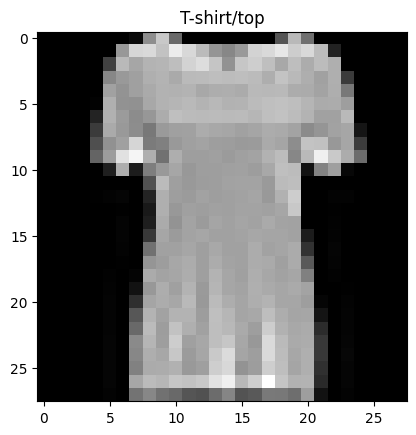

In [8]:
image, label = train_data[10]

print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

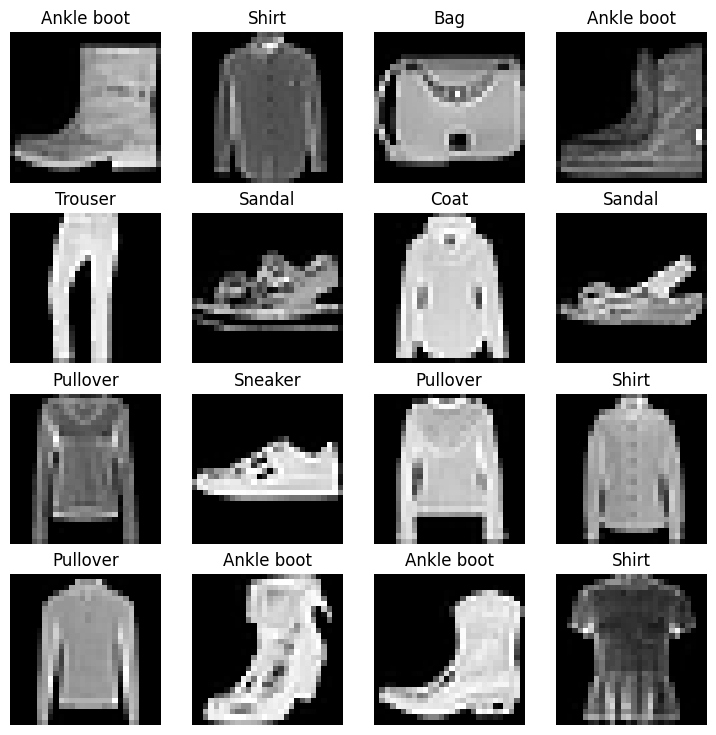

In [9]:
torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))

rows, cols = 4, 4

for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);


## Next 👉 Prepare DataLoader

Now that we have a dataset, the next step is to use **`torch.utils.data.DataLoader`** (or simply **DataLoader**).

### 🔹 What does DataLoader do?

* Loads data into a model (for both **training** and **inference**).
* Breaks a big dataset into **smaller chunks** called **batches** (or mini-batches).
* Makes the dataset behave like a **Python iterable**, so we can loop through it easily.

---

### 🔹 Why use batches?

* **Efficiency**: Instead of processing the whole dataset at once (which is slow and memory-heavy), we process smaller pieces.
* **More updates**: With mini-batches, the model updates weights **more often per epoch**, which can help it learn better.

---

### 🔹 Batch size

* A **batch size of 32** is a good starting point for many problems.
* Batch size is a **hyperparameter** → you can experiment with values.
* Usually, powers of 2 are common: **32, 64, 128, 256, 512**.

---

✅ In short: **DataLoader = Efficient way to feed data to your model in manageable chunks.**

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x127a5ffa0>, <torch.utils.data.dataloader.DataLoader object at 0x127a5f700>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [11]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


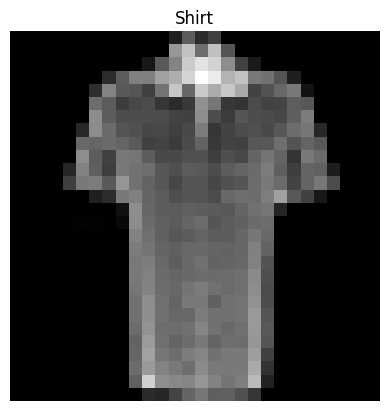

In [12]:
# train_features_batch[0]
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## **Notes on `nn.Flatten()`**

* **Purpose**:
  Converts a multi-dimensional tensor into a **one-dimensional vector** (while keeping the batch dimension intact).

* **Why use it?**

  * Many neural network layers (like `nn.Linear`) expect inputs as vectors rather than images or higher-dimensional tensors.
  * `nn.Flatten()` prepares image data (or any multi-dimensional data) for fully connected layers.

* **How it works**:

  * Input: `[batch_size, channels, height, width]`
  * Output: `[batch_size, channels * height * width]`

* **Example with FashionMNIST**:

  * Input image shape: `[1, 28, 28]` → 1 channel, 28×28 pixels
  * After `nn.Flatten()`: `[784]` (since 1×28×28 = 784)

* **In batches**:

  * Input shape: `[32, 1, 28, 28]` (32 images in a batch)
  * Output shape: `[32, 784]`

* **Key point**:
  `nn.Flatten()` does **not change the data values**, it only reshapes the tensor for processing.

In [13]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

In [14]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784, 
                              hidden_units=10, 
                              output_shape=len(class_names)).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [15]:
from helper_functions import accuracy_fn

In [16]:
loss_fn =  nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [17]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [18]:
from tqdm.auto import tqdm

train_time_start_on_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n 🏗️🏗️🏗️🏗️🏗️🏗️🏗️🏗️")

    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        #  Training mode
        model_0.train()


        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculating loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss


        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()


        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)

    ### Testing 
    test_loss, test_acc = 0, 0

    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_0(X)

            test_loss += loss_fn(test_pred, y)

            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

/opt/anaconda3/envs/env_pytorch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|                                                     | 0/5 [00:00<?, ?it/s]

Epoch: 0
 🏗️🏗️🏗️🏗️🏗️🏗️🏗️🏗️
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 20%|█████████                                    | 1/5 [00:08<00:32,  8.22s/it]


Train loss: 0.58804 | Test loss: 0.52466, Test acc: 81.48%

Epoch: 1
 🏗️🏗️🏗️🏗️🏗️🏗️🏗️🏗️
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 40%|██████████████████                           | 2/5 [00:16<00:24,  8.21s/it]


Train loss: 0.47645 | Test loss: 0.47678, Test acc: 83.34%

Epoch: 2
 🏗️🏗️🏗️🏗️🏗️🏗️🏗️🏗️
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 60%|███████████████████████████                  | 3/5 [00:24<00:16,  8.05s/it]


Train loss: 0.45479 | Test loss: 0.55112, Test acc: 81.43%

Epoch: 3
 🏗️🏗️🏗️🏗️🏗️🏗️🏗️🏗️
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 80%|████████████████████████████████████         | 4/5 [00:32<00:08,  8.11s/it]


Train loss: 0.44429 | Test loss: 0.48230, Test acc: 83.12%

Epoch: 4
 🏗️🏗️🏗️🏗️🏗️🏗️🏗️🏗️
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|█████████████████████████████████████████████| 5/5 [00:40<00:00,  8.07s/it]


Train loss: 0.43419 | Test loss: 0.46643, Test acc: 83.58%

Train time on cpu: 40.379 seconds


In [19]:
torch.manual_seed(42)

def eval_model(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)

            loss += loss_fn(y_pred, y)

            acc += accuracy_fn(y_true=y, 
                               # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
                               y_pred=y_pred.argmax(dim=1))

        

        loss /= len(data_loader)
        acc  /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }

In [20]:
eval_model(model=model_0, 
           data_loader=test_dataloader, 
           loss_fn=loss_fn, 
           accuracy_fn=accuracy_fn)

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46643465757369995,
 'model_acc': 83.57627795527156}

In [21]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

In [22]:
model_1 = FashionMNISTModelV1(input_shape=784, 
                              hidden_units=10, 
                              output_shape=len(class_names)).to(device)

In [23]:
next(model_1.parameters()).device

device(type='mps', index=0)

In [24]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [25]:
# Re-usable function for training
def train_step(model: torch.nn.Module, 
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn, 
              device: torch.device = device):
    
    train_loss, train_acc = 0, 0

    model.to(device)

    for batch, (X, y) in enumerate(data_loader):
        # Sending data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, 
                                 y_pred=y_pred.argmax(dim=1))

        # 3.Optimizer zero grad
        optimizer.zero_grad()

        # 4.Loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [26]:
def test_step(model: nn.Module, 
              data_loader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module, 
              accuracy_fn, 
              device: torch.device = device):
    test_loss, test_acc = 0, 0

    # Moving the model to GPU
    model.to(device)

    # Turning on the evaluation mode
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)

            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")            

In [27]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------------------------------------------")

    train_step(
        model=model_1,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )

    test_step(
        model=model_1,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )


train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|                                                    | 0/10 [00:00<?, ?it/s]

Epoch: 0
------------------------------------------
Train loss: 0.98248 | Train accuracy: 65.06%


 10%|████▍                                       | 1/10 [00:26<03:57, 26.44s/it]

Test loss: 0.76060 | Test accuracy: 72.80%
Epoch: 1
------------------------------------------
Train loss: 0.70374 | Train accuracy: 74.43%


 20%|████████▊                                   | 2/10 [00:52<03:29, 26.18s/it]

Test loss: 0.71959 | Test accuracy: 73.53%
Epoch: 2
------------------------------------------
Train loss: 0.67371 | Train accuracy: 75.37%


 30%|█████████████▏                              | 3/10 [01:18<03:02, 26.13s/it]

Test loss: 0.69469 | Test accuracy: 74.71%
Epoch: 3
------------------------------------------
Train loss: 0.65652 | Train accuracy: 75.80%


 40%|█████████████████▌                          | 4/10 [01:44<02:35, 25.98s/it]

Test loss: 0.67172 | Test accuracy: 75.26%
Epoch: 4
------------------------------------------
Train loss: 0.64775 | Train accuracy: 75.89%


 50%|██████████████████████                      | 5/10 [02:09<02:08, 25.71s/it]

Test loss: 0.68185 | Test accuracy: 75.21%
Epoch: 5
------------------------------------------
Train loss: 0.63568 | Train accuracy: 76.47%


 60%|██████████████████████████▍                 | 6/10 [02:34<01:42, 25.60s/it]

Test loss: 0.65739 | Test accuracy: 75.98%
Epoch: 6
------------------------------------------
Train loss: 0.62906 | Train accuracy: 76.60%


 70%|██████████████████████████████▊             | 7/10 [03:00<01:16, 25.48s/it]

Test loss: 0.66417 | Test accuracy: 75.38%
Epoch: 7
------------------------------------------
Train loss: 0.62495 | Train accuracy: 76.63%


 80%|███████████████████████████████████▏        | 8/10 [03:26<00:51, 25.62s/it]

Test loss: 0.66554 | Test accuracy: 75.52%
Epoch: 8
------------------------------------------
Train loss: 0.62114 | Train accuracy: 76.81%


 90%|███████████████████████████████████████▌    | 9/10 [03:52<00:25, 25.77s/it]

Test loss: 0.65442 | Test accuracy: 75.90%
Epoch: 9
------------------------------------------
Train loss: 0.61520 | Train accuracy: 76.80%


100%|███████████████████████████████████████████| 10/10 [04:17<00:00, 25.76s/it]

Test loss: 0.66045 | Test accuracy: 76.09%
Train time on mps: 257.640 seconds


In [28]:
torch.manual_seed(42)

def eval_model(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    model.to(device)
    
    loss, acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            loss += loss_fn(y_pred, y)

            acc += accuracy_fn(y_true=y, 
                               # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
                               y_pred=y_pred.argmax(dim=1))

        

        loss /= len(data_loader)
        acc  /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }

In [29]:
model_1_results = eval_model(model=model_1, 
                             accuracy_fn=accuracy_fn, 
                             loss_fn=loss_fn, 
                             data_loader=test_dataloader)

model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6604500412940979,
 'model_acc': 76.08825878594249}

# 🧠 Convolutional Neural Networks (CNNs) — Notes

### What is a CNN?

* A **Convolutional Neural Network** is a special type of neural network designed for **processing grid-like data**, such as images.
* It works by automatically learning **spatial features** (edges, shapes, textures, patterns) from raw data using convolutional layers.
* CNNs are widely used in **computer vision tasks** like image classification, object detection, and face recognition.

---

### 🔑 Key Components

1. **Input Layer**

   * Takes in the image (e.g., for FashionMNIST → `[1, 28, 28]` grayscale image).
   * If colored, it would be `[3, H, W]` for RGB.

2. **Convolutional Layer (Conv Layer)**

   * Applies **filters/kernels** that slide over the input image.
   * Captures **features** like edges, corners, textures.
   * Output = **Feature Maps**.

3. **Activation Function (ReLU)**

   * Introduces non-linearity so the model can learn complex features.

4. **Pooling Layer (e.g., MaxPooling)**

   * Reduces the size of feature maps → makes computation efficient.
   * Retains the most important information (downsampling).

5. **Fully Connected Layer (Dense Layer)**

   * Flattens the output of convolutions/pooling into a vector.
   * Works like a traditional neural network for classification.

6. **Output Layer**

   * Produces predictions (e.g., probabilities of classes using **Softmax**).

---

### 🖼️ Simple CNN Structure (Diagram)

```
          [Input Image]
                |
         ┌───────────────┐
         │ Convolutional  │  -> Feature Extraction
         └───────────────┘
                |
         ┌───────────────┐
         │ Activation     │ (ReLU)
         └───────────────┘
                |
         ┌───────────────┐
         │ Pooling Layer  │ (e.g., MaxPool)
         └───────────────┘
                |
         ┌───────────────┐
         │ Flatten Layer  │
         └───────────────┘
                |
         ┌───────────────┐
         │ Fully Connected│
         │    (Dense)     │
         └───────────────┘
                |
         ┌───────────────┐
         │   Output       │ (Softmax → Class Probabilities)
         └───────────────┘
```

---

👉 In short: **CNNs learn features → condense them → classify the image.**

In [30]:
SEED = 42

In [31]:
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                     out_channels=hidden_units,
                     kernel_size=3, 
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                           stride=2)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classfier = nn.Sequential(
            nn.Flatten(),

            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # first convulutional layer
        x = self.block_1(x)

        # second conv layer
        x = self.block_2(x)

        # print(x.shape)

        # last flatten and linear layer
        x = self.classfier(x)

        return x

In [32]:
torch.manual_seed(SEED)

model_2 = FashionMNISTModelV2(input_shape=1, 
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classfier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [33]:
### Set up a loss function and optimizer
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [34]:
torch.manual_seed(SEED)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------------------------------------------------")

    # training step
    train_step(
    model = model_2,
    data_loader = train_dataloader,
    loss_fn = loss_fn,
    optimizer= optimizer,
    accuracy_fn = accuracy_fn,
    )


    test_step(
    model = model_2,
    data_loader = train_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    )


train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|                                                     | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------------------------------------------------
Train loss: 0.59534 | Train accuracy: 78.47%


 33%|███████████████                              | 1/3 [01:17<02:35, 77.66s/it]

Test loss: 0.36434 | Test accuracy: 86.75%
Epoch: 1
---------------------------------------------------
Train loss: 0.35952 | Train accuracy: 87.03%


 67%|██████████████████████████████               | 2/3 [02:38<01:19, 79.27s/it]

Test loss: 0.35183 | Test accuracy: 87.76%
Epoch: 2
---------------------------------------------------
Train loss: 0.32226 | Train accuracy: 88.30%


100%|█████████████████████████████████████████████| 3/3 [03:57<00:00, 79.31s/it]

Test loss: 0.31477 | Test accuracy: 88.48%
Train time on mps: 237.940 seconds


In [37]:
model_0_results = eval_model(model_0, 
                             test_dataloader, 
                             loss_fn, 
                             accuracy_fn)

In [38]:
model_2_results = eval_model(model_2,
           test_dataloader,
           loss_fn,
           accuracy_fn)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34508776664733887,
 'model_acc': 87.18051118210863}

In [41]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])

compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.466435,83.576278,40.379189
1,FashionMNISTModelV1,0.660450,76.088259,257.639633
2,FashionMNISTModelV2,0.345088,87.180511,237.940437


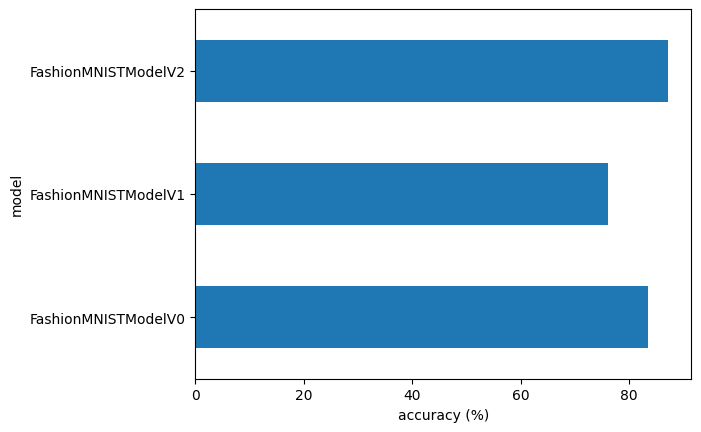

In [42]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [43]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []

    model.eval()

    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)

            pred_logit = model(sample)

            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            pred_probs.append(pred_prob.cpu())


    return torch.stack(pred_probs)

In [44]:
import random

random.seed(SEED)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [45]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.9771e-07, 2.8045e-08, 4.0700e-08, 2.3875e-08, 4.5320e-09, 9.9906e-01,
         2.4455e-08, 4.9281e-05, 2.5808e-05, 8.6484e-04],
        [2.1811e-02, 8.8364e-01, 1.1056e-03, 5.8200e-02, 1.7922e-02, 1.0433e-05,
         1.6886e-02, 2.2139e-04, 1.1875e-04, 8.7402e-05]])

In [46]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.9771e-07, 2.8045e-08, 4.0700e-08, 2.3875e-08, 4.5320e-09, 9.9906e-01,
         2.4455e-08, 4.9281e-05, 2.5808e-05, 8.6484e-04],
        [2.1811e-02, 8.8364e-01, 1.1056e-03, 5.8200e-02, 1.7922e-02, 1.0433e-05,
         1.6886e-02, 2.2139e-04, 1.1875e-04, 8.7402e-05]])

In [47]:
pred_classes = pred_probs.argmax(dim=1)

In [48]:
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

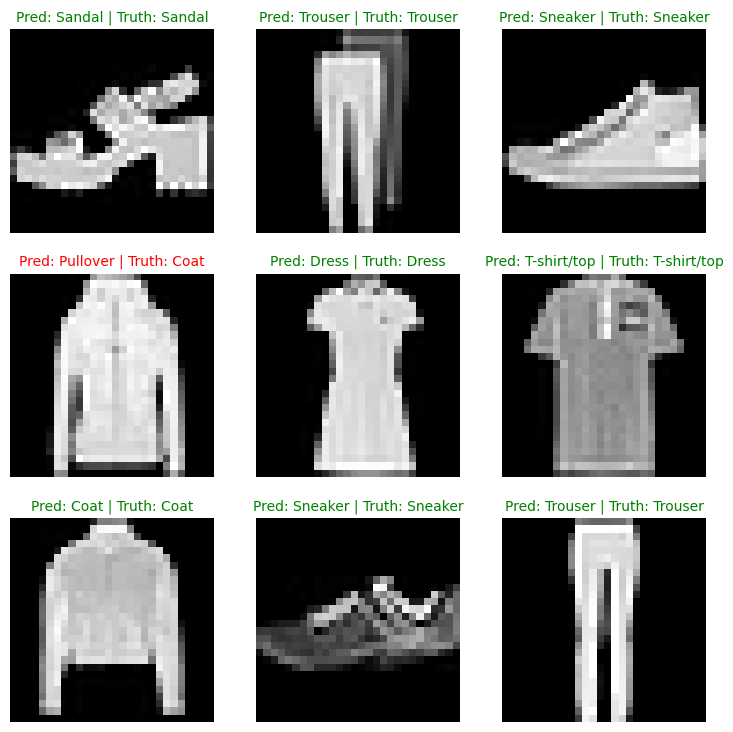

In [49]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [50]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|█████████████████████| 313/313 [00:03<00:00, 90.99it/s]


In [52]:
import mlxtend 
print(mlxtend.__version__)

0.23.4


In [53]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

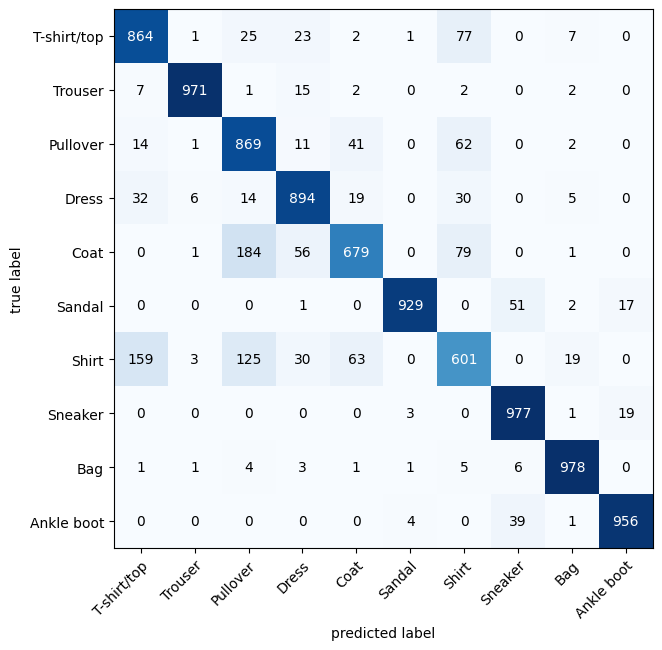

In [56]:
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                               class_names=class_names,
                               figsize=(10, 7))

In [57]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [60]:
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                     hidden_units=10, 
                                     output_shape=10)

In [61]:
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2 = loaded_model_2.to(device)

In [63]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34508776664733887,
 'model_acc': 87.18051118210863}

In [65]:
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)